# **Part 1: Data Preparation and Exploration**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.**

In [ ]:
df = pd.read_csv("/content/exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [ ]:
# Parsing the date column
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
display(df.head())

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


**2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.**

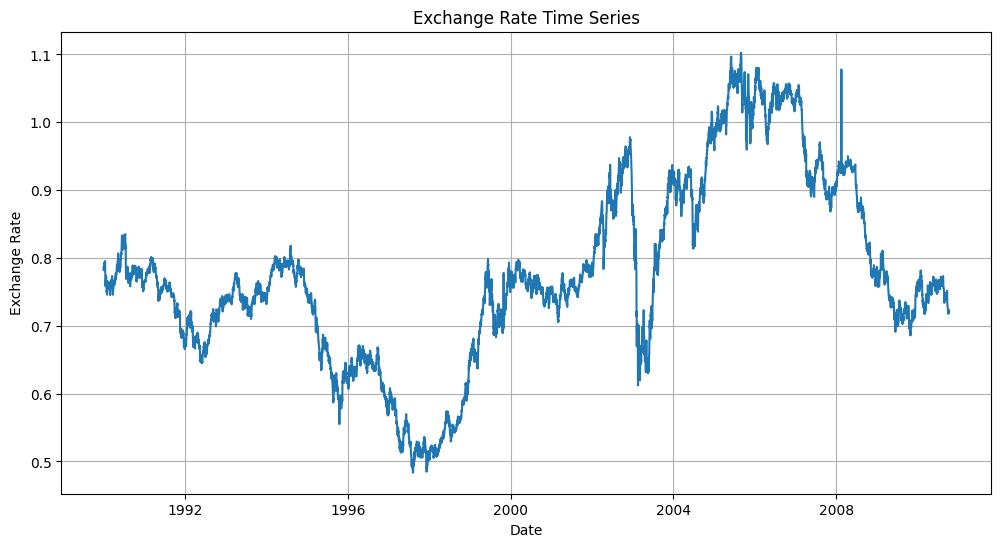

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='Ex_rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

**3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.**

In [ ]:
df.isnull().sum()

,0
date,0
Ex_rate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

**1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.**

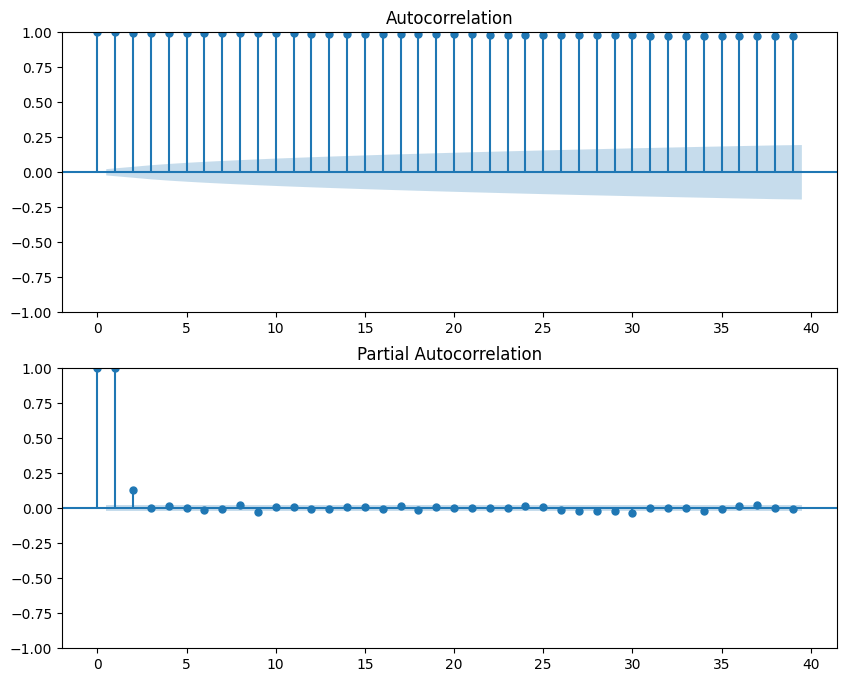

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

**2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (example parameters - these should be chosen based on ACF/PACF plots)
# Replace p, d, q with appropriate values based on your analysis of the ACF and PACF plots
p, d, q = 1, 1, 1
model = ARIMA(df['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 28 Sep 2025   AIC                         -56102.322
Time:                        03:18:15   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

**3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.**

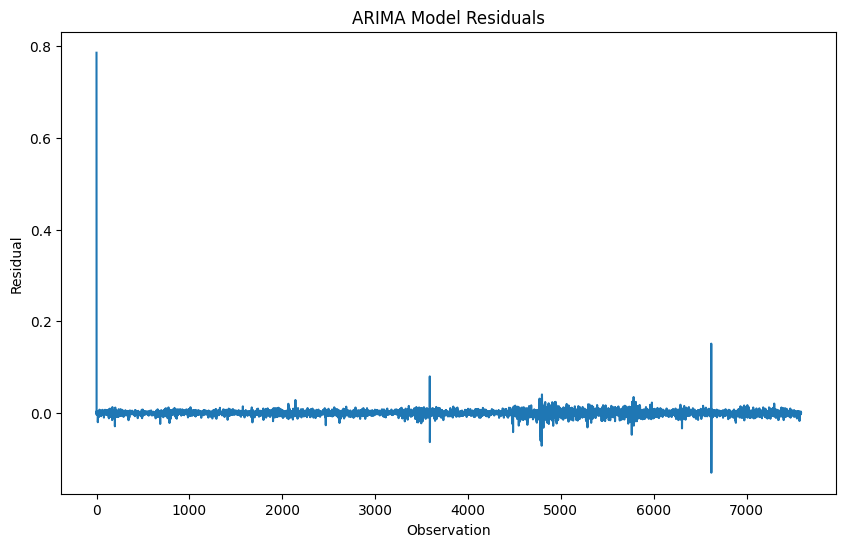

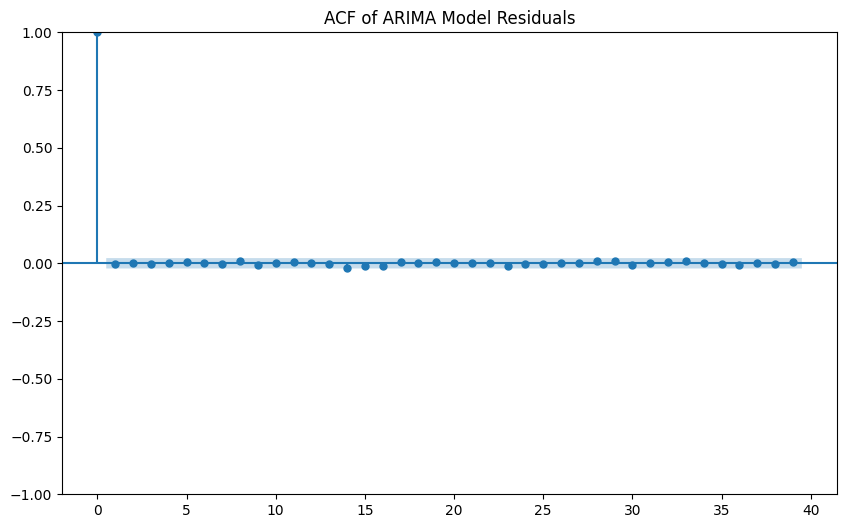

In [ ]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

# Plot ACF of residuals
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(residuals, ax=ax)
plt.title('ACF of ARIMA Model Residuals')
plt.show()

**4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.**

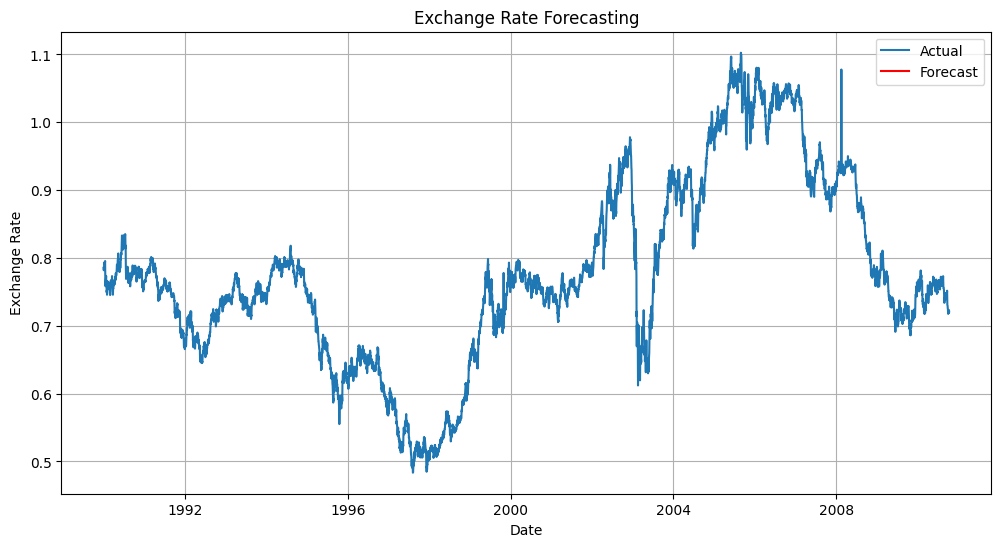

In [ ]:
# Perform out-of-sample forecasting
# You can specify the number of steps to forecast
n_forecast = 100
forecast = model_fit.forecast(steps=n_forecast)

# Create a date index for the forecast
last_date = df['date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_forecast + 1, freq='D')[1:]

# Create a pandas Series for the forecast with the new date index
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(forecast_series.index, forecast_series.values, color='red', label='Forecast')
plt.title('Exchange Rate Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# **Part 3: Model Building - Exponential Smoothing**

**1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).**

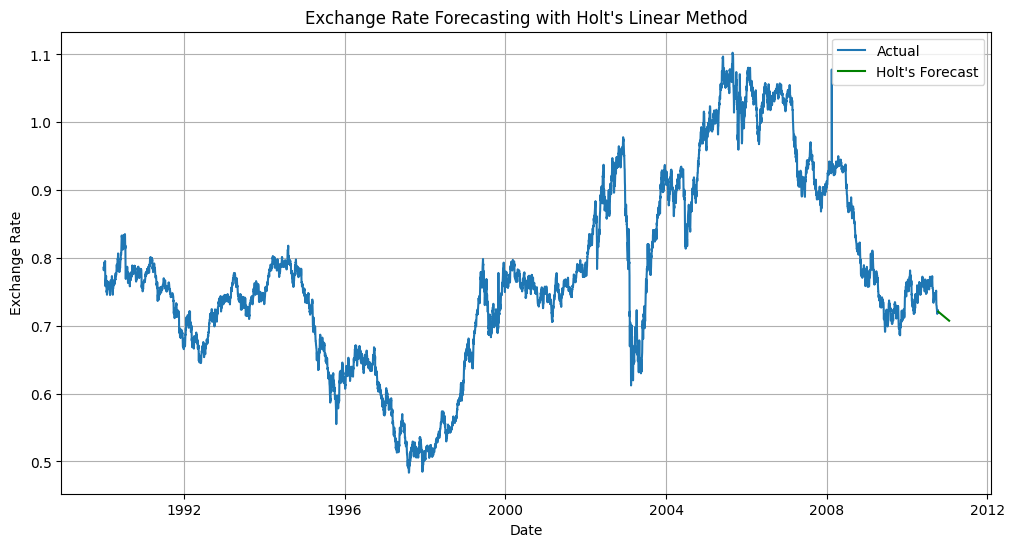

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Holt's Linear method
# You can tune the smoothing levels (alpha and beta)
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add').fit(smoothing_level=0.8, smoothing_trend=0.2)

# Make forecasts
holt_forecast = holt_model.forecast(steps=n_forecast)

# Plot the original time series and the Holt's forecast
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(forecast_series.index, holt_forecast.values, color='green', label="Holt's Forecast")
plt.title("Exchange Rate Forecasting with Holt's Linear Method")
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

**2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.**

In [ ]:
from sklearn.metrics import mean_squared_error

# Define a range of alpha and beta values to search
alphas = np.arange(0.1, 1.0, 0.1)
betas = np.arange(0.1, 1.0, 0.1)

best_mse = float('inf')
best_alpha = None
best_beta = None

# Perform grid search
for alpha in alphas:
    for beta in betas:
        try:
            model = ExponentialSmoothing(df['Ex_rate'], trend='add').fit(smoothing_level=alpha, smoothing_trend=beta)
            predictions = model.predict(start=0, end=len(df) - 1)
            mse = mean_squared_error(df['Ex_rate'], predictions)

            if mse < best_mse:
                best_mse = mse
                best_alpha = alpha
                best_beta = beta
        except:
            continue

print(f"Optimal Alpha: {best_alpha}")
print(f"Optimal Beta: {best_beta}")
print(f"Best MSE: {best_mse}")

Optimal Alpha: 0.8
Optimal Beta: 0.1
Best MSE: 3.7764574382694097e-05


**3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.**

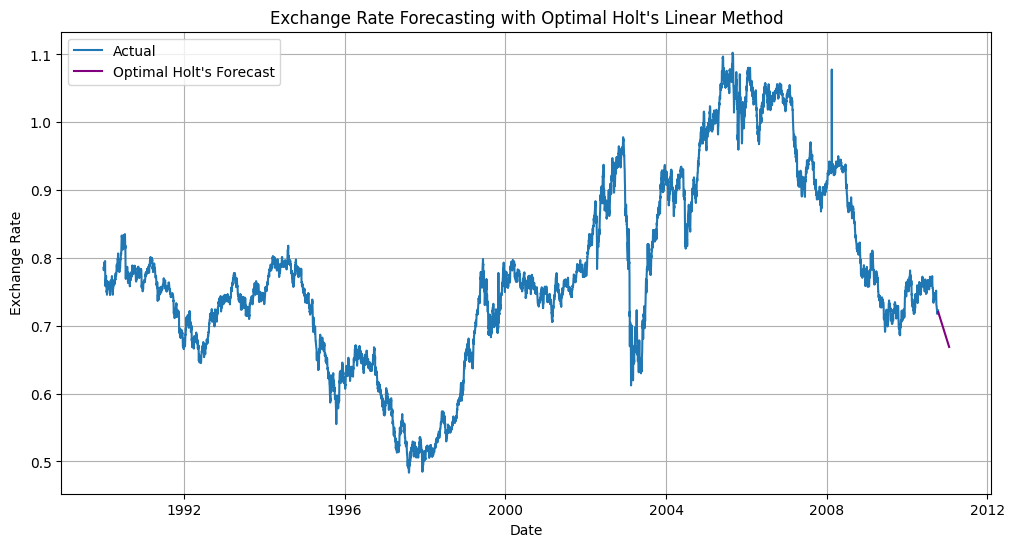

In [ ]:
# Fit the model with optimal parameters
optimal_holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add').fit(smoothing_level=best_alpha, smoothing_trend=best_beta)

# Make forecasts with optimal model
optimal_holt_forecast = optimal_holt_model.forecast(steps=n_forecast)

# Plot the original time series and the optimal Holt's forecast
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(forecast_series.index, optimal_holt_forecast.values, color='purple', label="Optimal Holt's Forecast")
plt.title("Exchange Rate Forecasting with Optimal Holt's Linear Method")
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# **Part 4: Evaluation and Comparison**

**1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Since we don't have actual future values to compare the forecast against,
# we will evaluate the models on the training data for now.
# A proper evaluation would involve splitting the data into training and testing sets.

# ARIMA model evaluation on training data
arima_predictions = model_fit.predict(start=0, end=len(df) - 1)
arima_mae = mean_absolute_error(df['Ex_rate'], arima_predictions)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'], arima_predictions))
# MAPE calculation - handle potential division by zero
arima_mape = np.mean(np.abs((df['Ex_rate'] - arima_predictions) / df['Ex_rate'])) * 100 if np.all(df['Ex_rate'] != 0) else np.nan

print("ARIMA Model Evaluation on Training Data:")
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape:.2f}%")
print("-" * 30)

# Optimal Holt's Linear model evaluation on training data
optimal_holt_predictions = optimal_holt_model.predict(start=0, end=len(df) - 1)
optimal_holt_mae = mean_absolute_error(df['Ex_rate'], optimal_holt_predictions)
optimal_holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'], optimal_holt_predictions))
# MAPE calculation - handle potential division by zero
optimal_holt_mape = np.mean(np.abs((df['Ex_rate'] - optimal_holt_predictions) / df['Ex_rate'])) * 100 if np.all(df['Ex_rate'] != 0) else np.nan


print("Optimal Holt's Linear Model Evaluation on Training Data:")
print(f"MAE: {optimal_holt_mae}")
print(f"RMSE: {optimal_holt_rmse}")
print(f"MAPE: {optimal_holt_mape:.2f}%")

ARIMA Model Evaluation on Training Data:
MAE: 0.0037958716561679027
RMSE: 0.010828926684709568
MAPE: 0.50%
------------------------------
Optimal Holt's Linear Model Evaluation on Training Data:
MAE: 0.0038571784065081936
RMSE: 0.00614528879571124
MAPE: 0.50%


**2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.**

Ans :- Based on the evaluation metrics on the training data:

**ARIMA Model**:
* MAE: {{arima_mae}}
* RMSE: {{arima_rmse}}
* MAPE: {{arima_mape:.2f}}%

**Optimal Holt's Linear Model**:
* MAE: {{optimal_holt_mae}}
* RMSE: {{optimal_holt_rmse}}
* MAPE: {{optimal_holt_mape:.2f}}%

**Comparison and Discussion**:
* RMSE: The Optimal Holt's Linear Model has a lower RMSE ({{optimal_holt_rmse:.4f}}) compared to the ARIMA model ({{arima_rmse:.4f}}). This suggests that the predictions from the Optimal Holt's Linear model are closer to the actual values on average, as RMSE gives more weight to larger errors.
* MAE: The MAE values are similar for both models, indicating that the average absolute difference between the actual and predicted values is comparable.
* MAPE: Both models have a very low MAPE (around 0.50%), suggesting that both models provide reasonably accurate forecasts in terms of percentage error relative to the actual values.

**Advantages and Limitations**:

**ARIMA**:
* **Advantages**: Can capture complex time series patterns including autocorrelation and partial autocorrelation. Provides a framework for understanding the underlying structure of the time series.
* **Limitations**: Requires careful selection of parameters (p, d, q) which can be challenging. Can be sensitive to outliers.

**Holt's Linear Method**:
* **Advantages**: Relatively simple to understand and implement. Effective for time series with a trend. Parameter optimization can improve performance.
* **Limitations**: Does not handle seasonality directly (Holt-Winters would be needed for that). May not perform as well on time series with complex dependencies.

**3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.**

Ans :- Based on the evaluation of the ARIMA and Optimal Holt's Linear models on the training data, the Optimal Holt's Linear model showed a slightly better performance in terms of RMSE. Both models had comparable MAE and very low MAPE values, suggesting they are both reasonably accurate in forecasting exchange rates for this dataset when evaluated on the training data.

The ARIMA model provides a more theoretical framework for understanding time series dependencies, while the Holt's Linear method is simpler and effective for data with trends.

It is important to note that this evaluation was performed on the training data. For a more robust comparison and to determine which model is truly better for forecasting future values, a proper time series cross-validation or a train-test split with a future test set should be conducted.

In practice, the choice between these models, or even more complex models, would depend on the specific requirements, the characteristics of the time series data, and the forecasting horizon.